# **Setup e carregamento dos dados**

Aqui começamos por importar as bibliotecas necessárias e carregar os dados do ficheiro CSV.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

from pathlib import Path
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import f_classif
# from sklearn.preprocessing import StandardScaler

# Configurar o estilo
plt.style.use('default')  # Using default style instead
sns.set_style("whitegrid")  # Set seaborn style
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10

DATA_PATH = Path("group_15.csv")
assert DATA_PATH.exists(), f"Ficheiro não encontrado: {DATA_PATH}"

df = pd.read_csv(DATA_PATH)
print("Dimensão:", df.shape)
df.head()


Dimensão: (3000, 49)


,duration_1,duration_2,duration_3,duration_4,duration_5,loudness_level,popularity_level,tempo_class,time_signature,key_mode,...,is_instrumental,is_dance_hit,temp_zscore,resonance_factor,timbre_index,echo_constant,distorted_movement,signal_power,target_class,target_regression
0,0.0,0.0,1.0,0.0,0.0,4.0,3.0,1.0,0.221824,0.767388,...,0.0,0.0,0.755223,1.619076,0.778312,1,0.093345,0.232,class_53,0.930791
1,0.0,0.0,0.0,1.0,0.0,2.0,3.0,1.0,0.221824,0.485996,...,0.0,0.0,0.634436,-1.100584,0.086806,1,0.300788,0.365,class_53,0.751458
2,0.0,0.0,0.0,1.0,0.0,4.0,3.0,1.0,0.221824,0.485996,...,0.0,0.0,0.635036,-1.173949,0.011324,1,0.352649,0.327,class_53,0.213459
3,0.0,0.0,0.0,1.0,0.0,4.0,3.0,2.0,0.221824,-0.076786,...,0.0,0.0,-1.528729,0.669622,0.954538,1,1.447484,0.162,class_53,0.572125
4,0.0,0.0,0.0,1.0,0.0,2.0,3.0,1.0,0.221824,0.485996,...,0.0,0.0,-0.929196,0.863212,0.706977,1,-1.589244,0.295,class_53,0.572125


# **Exploração inicial**
Aqui fazemos algumas conversões de tipos de dados e exploramos o dataset para entender melhor a sua estrutura e conteúdo.

---

Nesta célula abaixo, conseguimos ver os tipos de dados presentes no dataset.

In [2]:
dtypes = df.dtypes.astype(str).to_frame("dtype")
display(dtypes)

,dtype
duration_1,float64
duration_2,float64
duration_3,float64
duration_4,float64
duration_5,float64
loudness_level,float64
popularity_level,float64
tempo_class,float64
time_signature,float64
key_mode,float64


Verificamos que existem algumas colunas que são do tipo 'object', vamos verificar se algumas dessas colunas podem ser convertidas para numéricas.

In [3]:
display(df.select_dtypes(include=['object']).head(10))

,signal_strength,focus_factor,signal_power,target_class
0,0.232,0.000548,0.232,class_53
1,0.365,0.0,0.365,class_53
2,0.327,0.0,0.327,class_53
3,0.162,0.0235,0.162,class_53
4,0.295,0.000279,0.295,class_53
5,0.177,9.82e-05,0.177,class_53
6,0.211,1.44e-05,0.211,class_53
7,0.173,0.000111,0.173,class_53
8,0.36,0.0,0.36,class_53
9,0.182,0.00604,0.182,class_53


Como verificamos acima, as colunas 'signal_strength', 'focus_factor' e 'signal_power' são do tipo 'object' mas  podem ser convertidas para numéricas.
Vamos proceder a essas conversões.

In [4]:
df['signal_strength']= pd.to_numeric(df['signal_strength'], errors='coerce')
df['focus_factor']= pd.to_numeric(df['focus_factor'], errors='coerce')
df['signal_power']= pd.to_numeric(df['signal_power'], errors='coerce')

print(df[['signal_strength', 'focus_factor', 'signal_power']])

      signal_strength  focus_factor  signal_power
0               0.232      0.000548         0.232
1               0.365      0.000000         0.365
2               0.327      0.000000         0.327
3               0.162      0.023500         0.162
4               0.295      0.000279         0.295
...               ...           ...           ...
2995            0.993      0.945000         0.993
2996            0.895      0.919000         0.895
2997            0.999      0.988000         0.999
2998            0.998      0.992000         0.998
2999            0.508      0.000000         0.508

[3000 rows x 3 columns]


# **Análise exploratória dos dados**
Aqui fazemos uma análise exploratória dos dados para entender melhor as suas características e identificar possíveis padrões ou anomalias.

---

Definimos as variáveis target de classificação e regressão.

In [5]:
target_class= 'target_class'
target_regression= 'target_regression'

print("Target de classificação:", target_class)
print("Target de regressão:", target_regression)

Target de classificação: target_class
Target de regressão: target_regression


## Estatísticas descritivas

Este passo é importante para nos ajudar a entender melhor a distribuição dos dados e identificar possíveis outliers e tendências.

### Descrição das features numéricas
Aqui calculamos algumas estatísticas descritivas para as features numéricas do dataset.

In [6]:
desc_num = df.select_dtypes(include=[np.number]).describe().T
display(desc_num)

,count,mean,std,min,25%,50%,75%,max
duration_1,3000.0,0.005000,0.070545,0.000000,0.000000,0.000000e+00,0.000000,1.000000
duration_2,3000.0,0.039667,0.195207,0.000000,0.000000,0.000000e+00,0.000000,1.000000
duration_3,3000.0,0.141667,0.348766,0.000000,0.000000,0.000000e+00,0.000000,1.000000
duration_4,3000.0,0.802667,0.398052,0.000000,1.000000,1.000000e+00,1.000000,1.000000
duration_5,3000.0,0.011000,0.104320,0.000000,0.000000,0.000000e+00,0.000000,1.000000
loudness_level,3000.0,3.111667,1.271903,0.000000,2.000000,4.000000e+00,4.000000,4.000000
popularity_level,3000.0,1.681333,0.952936,0.000000,1.000000,1.000000e+00,3.000000,4.000000
tempo_class,3000.0,1.154667,0.416497,0.000000,1.000000,1.000000e+00,1.000000,4.000000
time_signature,3000.0,-0.609543,2.318389,-9.024149,0.221824,2.218242e-01,0.221824,2.533318
key_mode,3000.0,-0.046687,1.000321,-1.511882,-0.920961,-7.678645e-02,0.767388,1.611562


### Target Classificação
Aqui calculamos algumas estatísticas descritivas para o target de classificação.


Distribuição do target_class:
 target_class
class_53     1000
class_96     1000
class_103    1000
Name: count, dtype: int64


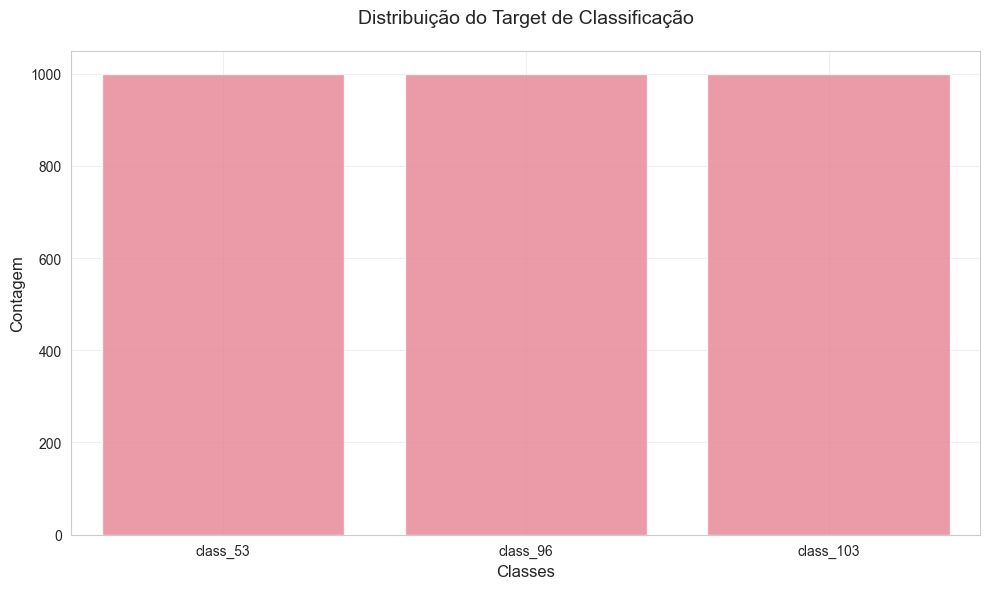

In [7]:
class_dist = df[target_class].value_counts(dropna=False)
print("\nDistribuição do target_class:\n", class_dist)

# Calcular distribuição e percentagens
class_dist = df[target_class].value_counts(dropna=False)
class_pct = df[target_class].value_counts(normalize=True) * 100

fig, ax = plt.subplots(figsize=(10, 6))

bars = sns.barplot(x=class_dist.index, y=class_dist.values, alpha=0.8)

plt.title('Distribuição do Target de Classificação', pad=20, fontsize=14)
plt.xlabel('Classes', fontsize=12)
plt.ylabel('Contagem', fontsize=12)
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()



Podemos concluir que o 'target_class' está perfeitamente equilibrado, onde cada classe tem 1000 registos.

### Target Regressão
Aqui calculamos algumas estatísticas descritivas para o target de regressão.

In [8]:
yreg = df[target_regression]

reg_summary = pd.Series({
    "count": yreg.shape[0],
    "mean": yreg.mean(),
    "std": yreg.std(ddof=1),
    "min": yreg.min(),
    "25%": yreg.quantile(0.25),
    "50%": yreg.median(),
    "75%": yreg.quantile(0.75),
    "max": yreg.max(),
    "skew": yreg.skew(),
    "kurtosis": yreg.kurtosis()
    }, name="target_regression_summary")
display(reg_summary.to_frame())



,target_regression_summary
count,3000.000000
mean,0.060129
std,0.927742
min,-1.490205
25%,-0.907373
50%,0.123792
75%,0.885958
max,2.499956
skew,-0.071298
kurtosis,-1.284415


## Análise Univariada
Esta análise foca-se em examinar cada variável individualmente para entender a sua distribuição e características.

### Distribuição do target de regressão

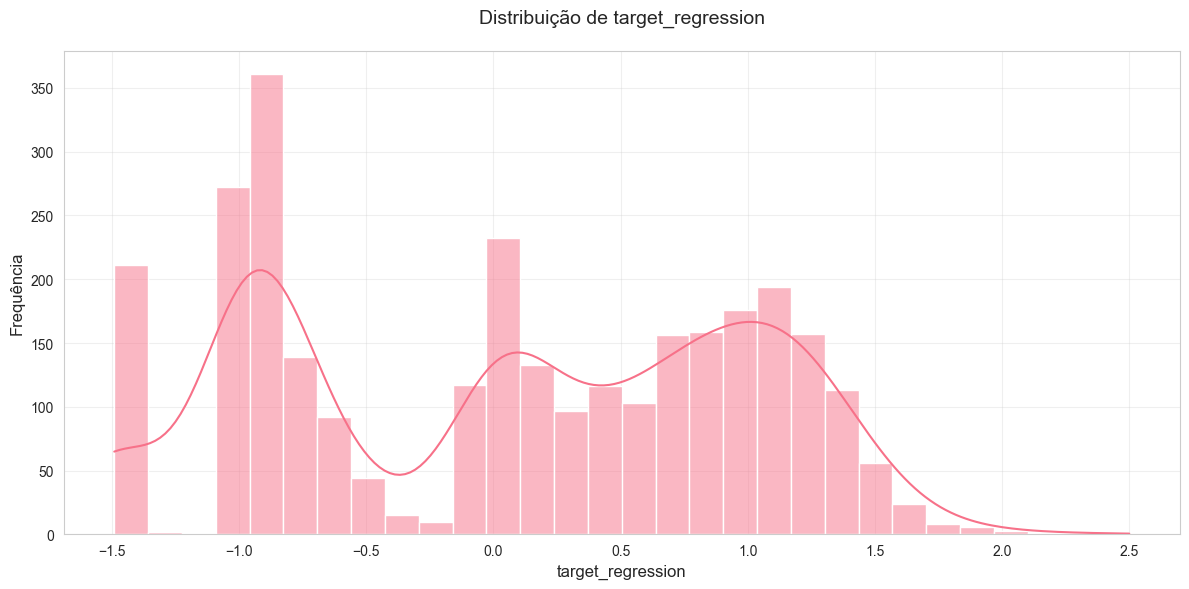

In [9]:
fig = plt.figure(figsize=(12, 6))
sns.histplot(data=df, x=target_regression, bins=30, kde=True)
plt.title(f"Distribuição de {target_regression}", pad=20)
plt.xlabel(target_regression)
plt.ylabel("Frequência")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

###  Distribuição de todas as features 
Aqui analisamos as distribuições de todas as features do dataset pois estas features podem mostrar caracteristicas que nos ajudem no pré-processamento dos dados.

Features: 47


C:\Users\DavidMendonça\AppData\Local\Temp\ipykernel_11448\662335238.py:16: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


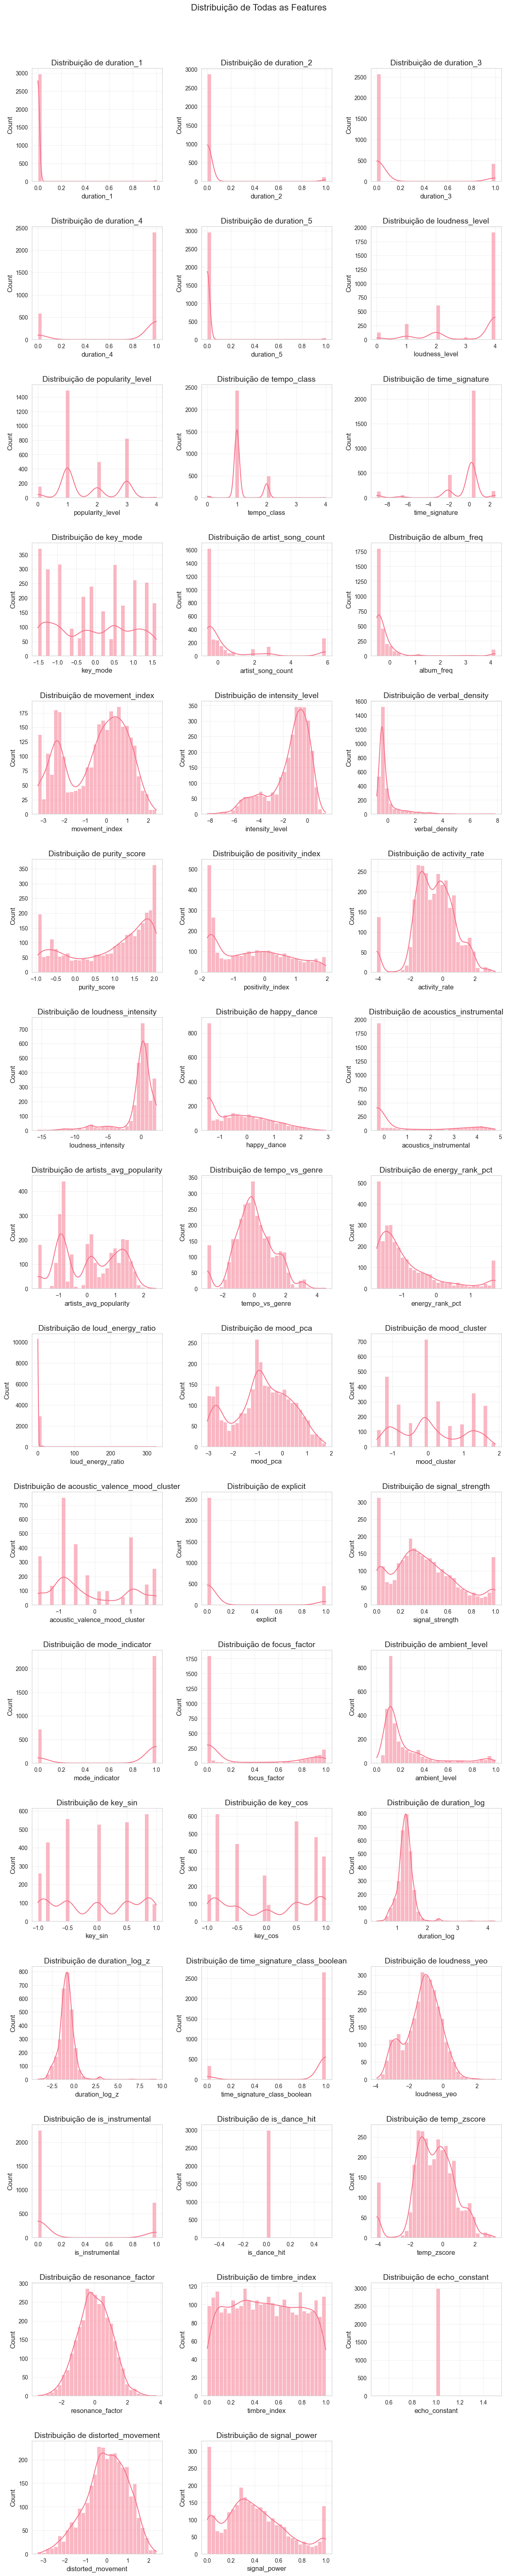

Número total de variáveis: 47


In [10]:
n_cols = 3  
features = [c for c in df.columns if c not in [target_class, target_regression]]
print(f"Features: {len(features)}")
n_rows = (len(features) + n_cols - 1) // n_cols
fig = plt.figure(figsize=(15, 5*n_rows))
gs = gridspec.GridSpec(n_rows, n_cols)
gs.update(wspace=0.3, hspace=0.4)

for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(data=df, x=feat, bins=30, kde=True)
    plt.title(f"Distribuição de {feat}")
    plt.grid(True, alpha=0.3)
    
plt.suptitle("Distribuição de Todas as Features", y=0.90, fontsize=16)  
plt.tight_layout()
plt.show()

print(f"Número total de variáveis: {len(features)}")

### Remoção de linhas duplicadas
Aqui removemos as linhas duplicadas do dataset para garantir que cada registo é único.

In [11]:
n_duplicates = df.duplicated().sum()
print(f"Número de linhas duplicadas: {n_duplicates}")
print(f"Dimensão original do DataFrame: {df.shape}")

# Remover linhas duplicadas
df = df.drop_duplicates()

# Verificar nova dimensão do DataFrame
print(f"Nova dimensão do DataFrame: {df.shape}")
print(f"Número de linhas removidas: {n_duplicates}")

Número de linhas duplicadas: 0
Dimensão original do DataFrame: (3000, 49)
Nova dimensão do DataFrame: (3000, 49)
Número de linhas removidas: 0


### Análise de valores nulos e valores únicos
Com esta análise conseguimos identificar colunas com valores nulos e através dos valores únicos conseguimos identificar se as colunas númericas estão em escalas diferentes.

In [12]:

info_df = pd.DataFrame({
    'Missing Values': df.isnull().sum(),
    'Missing (%)': (df.isnull().sum() / len(df)) * 100,
    'Unique Values': df.nunique(),
})

info_df = info_df.sort_values('Missing Values', ascending=True)

info_df['Missing (%)'] = info_df['Missing (%)'].round(2)

display(info_df)

total_null_rows = df.isnull().any(axis=1).sum()
print(f"\nTotal de linhas com valores nulos: {total_null_rows}")
print(f"Percentagem de linhas com valores nulos: {(total_null_rows/len(df)*100):.2f}%")

,Missing Values,Missing (%),Unique Values
duration_1,0,0.00,2
duration_2,0,0.00,2
duration_3,0,0.00,2
duration_4,0,0.00,2
duration_5,0,0.00,2
loudness_level,0,0.00,5
popularity_level,0,0.00,5
tempo_class,0,0.00,5
time_signature,0,0.00,5
key_mode,0,0.00,24



Total de linhas com valores nulos: 5
Percentagem de linhas com valores nulos: 0.17%


Como temos uma percentagem baixa de linhas com valores nulos (0.17%), optamos por remover as linhas com valores nulos.

In [13]:
df = df.dropna(how='any', axis=0)

null_count = df.isnull().any(axis=1).sum()
print(f"  - Linhas com valores nulos: {null_count}")

  - Linhas com valores nulos: 0


## Conclusões da Análise Univariada
Aqui apresentamos as principais conclusões obtidas a partir da análise univariada dos dados.

### Colunas constantes
Como podemos verificar nos histogramas acima, as colunas 'is_dance_hit' e 'echo_constant' são constantes, ou seja, apresentam o mesmo valor para todos os registos. 

Estas colunas não fornecem informação útil para a modelagem e podem ser removidas do dataset.

In [14]:
const_cols = df.columns[df.nunique() <= 1].tolist()

if const_cols:
    print(f" Colunas constantes: {const_cols}")
    
df = df.drop(columns=const_cols)

 Colunas constantes: ['is_dance_hit', 'echo_constant']


### Diferença de escalas nos dados
Através da análise dos valores únicos e dos histogramas conseguimos identificar que algumas colunas numéricas estão em escalas diferentes. 

É importante agrupar as features pelos tipos semânticos e não apenas pelo 'dtype'. Já que diferentes tipos de variáveis numéricas podem exigir diferentes técnicas de pré-processamento.

Verificamos a existência de: 

- **Variáveis do tipo binárias** no formato de **one-hot encoding**( duration_1-5, explicit, mode_indicator, is_instrumental etc..), que são do tipo numérico mas representam categorias,


- **Variáveis categóricas discretas**(loudness_level,popularity_level, tempo_class, time signature e target_class), que são do tipo numérico mas representam categorias com uma ordem,


- **Variáveis contínuas já normalizadas (z-score)** (duration_log, temp_zscore, key_sin etc..) 


- **Variáveis contínuas não normalizadas**(album_freq, artist_song_count, signal_strength etc..).

## Análise Bivariada
Esta análise foca-se em examinar a relação entre as features e as variáveis target para entender o impacto de cada feature nos targets.

### Análise bivariada com o target de regressão
Aqui analisamos a relação entre as features e o target de regressão. Embora tenhamos dados com escalas diferentes, ainda não vamos fazer para já qualquer normalização já que os métodos de correlação que vamos usar são insensíveis a essas diferenças de escala. No entanto, utilizamos as métricas apropriadas a cada tipo de variável. 

Nesta célula são definidos manualmente os grupos de variáveis do dataset,
de acordo com a análise prévia das suas escalas e significados semânticos.

In [15]:
num_df = df.select_dtypes(include=[np.number])
X = num_df.drop(columns=[target_regression], errors='ignore')
y = df[target_regression]


# Binárias (0/1) 
binary_cols = [
    'explicit', 'mode_indicator', 'is_instrumental', 'is_dance_hit',
    'time_signature_class_boolean', 'echo_constant',
    'duration_1', 'duration_2', 'duration_3', 'duration_4', 'duration_5',
    'key_mode'  # assumido 0/1 (ex.: minor/major)
]

# Spearman 
ordinal_cols = [
    'loudness_level', 'popularity_level', 'tempo_class', 'time_signature'
]


zscore_cols = [
    'temp_zscore', 'duration_log_z', 'key_sin', 'key_cos'
]


continuous_non_scaled = [
    'artist_song_count', 'album_freq', 'movement_index', 'intensity_level',
    'verbal_density', 'purity_score', 'positivity_index', 'activity_rate',
    'loudness_intensity', 'happy_dance', 'acoustics_instrumental',
    'artists_avg_popularity', 'tempo_vs_genre', 'energy_rank_pct',
    'loud_energy_ratio', 'mood_pca', 'mood_cluster',
    'acoustic_valence_mood_cluster', 'signal_strength', 'focus_factor',
    'ambient_level', 'duration_log', 'loudness_yeo', 'resonance_factor',
    'timbre_index', 'distorted_movement', 'signal_power'
    
]

# Para a análise bivariada e gráficos, tratamos z-scores como contínuas
continuous_cols = continuous_non_scaled + zscore_cols

### Correlação por tipo de variável
Para ordinais usamos a Spearman já que esta métrica tem em conta a ordem dos valores.

Para as variáveis contínuas e binárias usamos a Pearson. 

In [16]:
rows = []
for c in X.columns:
    if c in ordinal_cols:
        r = df[c].corr(y, method='spearman')
        metric = 'spearman'
        vtype = 'ordinal'
    else:
        r = df[c].corr(y, method='pearson')
        metric = 'pearson'
        vtype = 'binária' if c in binary_cols else 'contínua'
    rows.append((c, r, abs(r), metric, vtype))

corr_rank_regression = (
    pd.DataFrame(rows, columns=['feature','r','|r|','metric','tipo'])
      .dropna()
      .sort_values('|r|', ascending=False)
      .set_index('feature')
)

display(corr_rank_regression.head(20))


,r,|r|,metric,tipo
feature,,,,
artists_avg_popularity,0.940299,0.940299,pearson,contínua
popularity_level,0.464236,0.464236,spearman,ordinal
artist_song_count,-0.409517,0.409517,pearson,contínua
explicit,0.370942,0.370942,pearson,binária
album_freq,-0.331766,0.331766,pearson,contínua
verbal_density,0.331364,0.331364,pearson,contínua
mode_indicator,-0.242538,0.242538,pearson,binária
positivity_index,-0.239019,0.239019,pearson,contínua
purity_score,-0.187523,0.187523,pearson,contínua


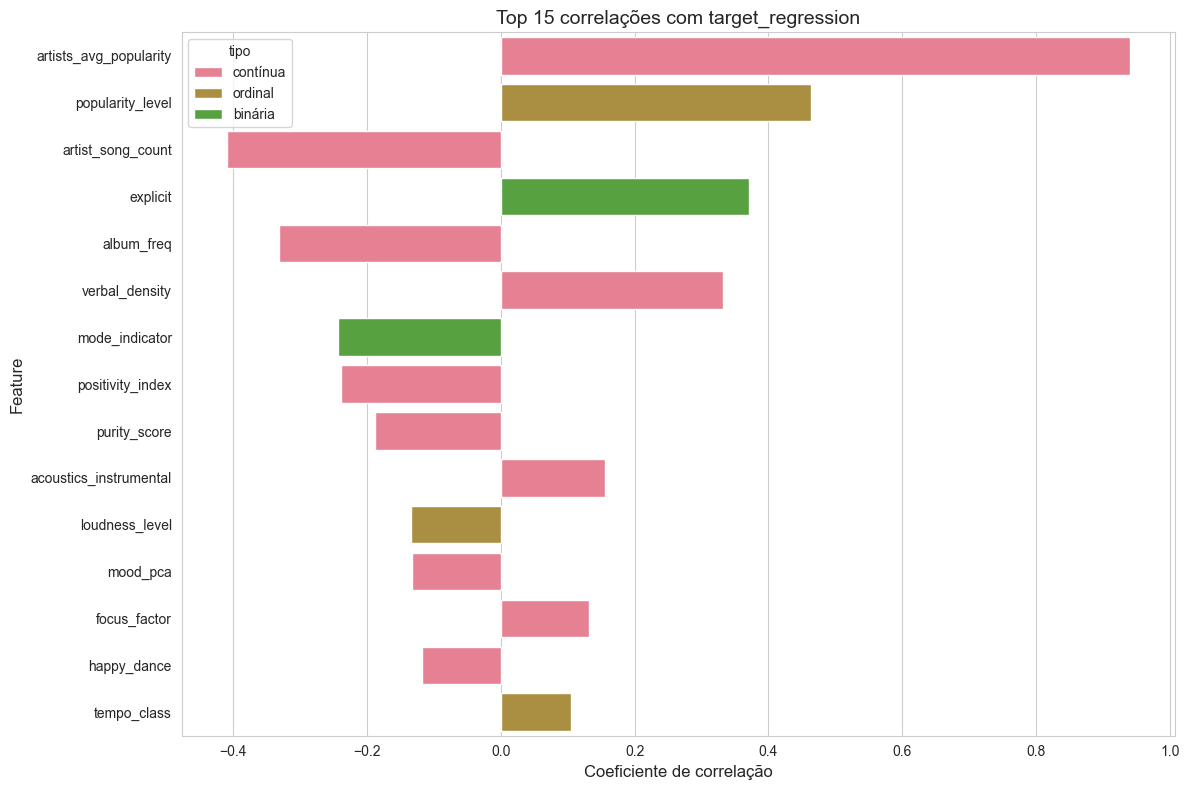

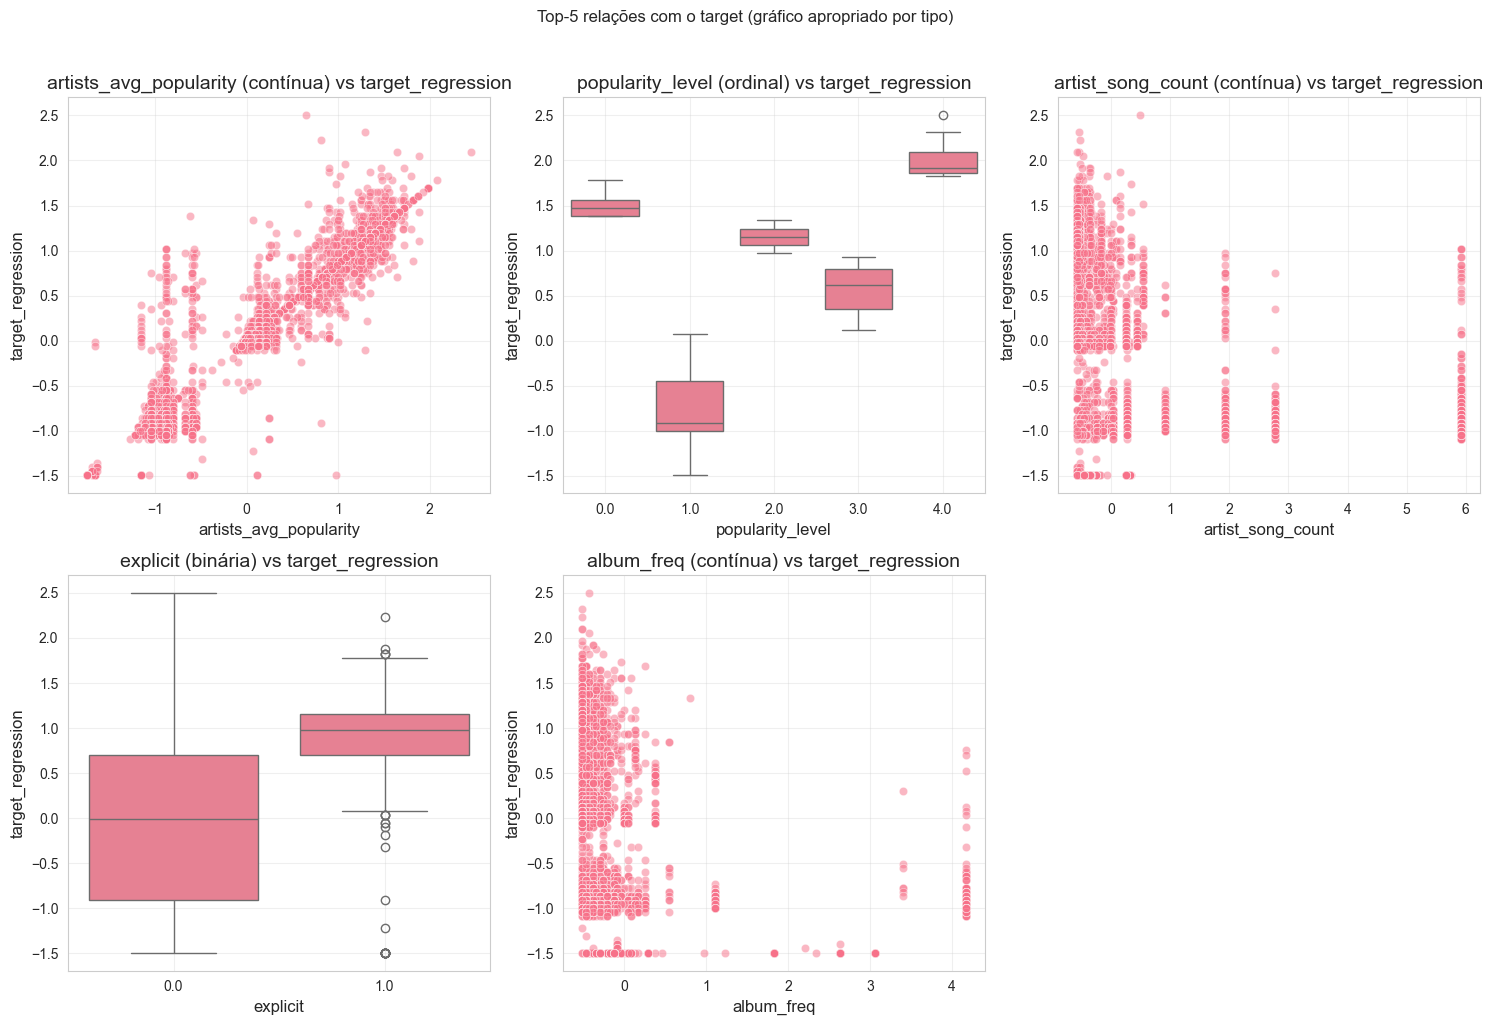

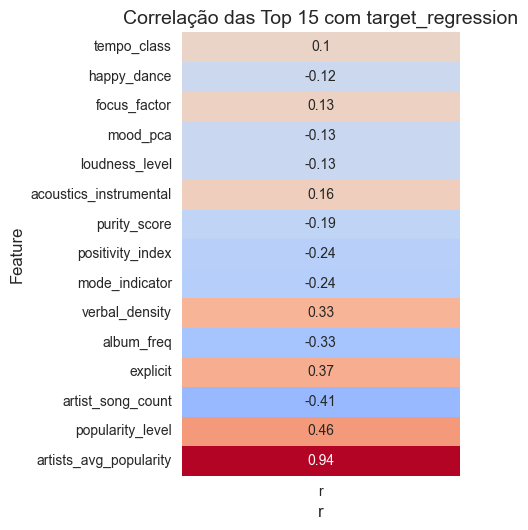

In [17]:
# Plot do ranking de correlações
TOP_N = 15
_top = corr_rank_regression.head(TOP_N).reset_index()
sns.barplot(data=_top, x='r', y='feature', hue='tipo', dodge=False)
plt.title(f'Top {TOP_N} correlações com {target_regression}')
plt.xlabel('Coeficiente de correlação')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

# Scatter/Box plots das top 5
top_5_features = corr_rank_regression.head(5).index.tolist()
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.delaxes(axes[1, 2])  # remove último subplot

for idx, feature in enumerate(top_5_features):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]

    if feature in continuous_cols:
        sns.scatterplot(data=df, x=feature, y=target_regression, alpha=0.5, ax=ax)
        ax.set_title(f'{feature} (contínua) vs {target_regression}')
    else:
        sns.boxplot(data=df, x=feature, y=target_regression, ax=ax)
        ax.set_title(f'{feature} ({corr_rank_regression.loc[feature,"tipo"]}) vs {target_regression}')
    ax.grid(True, alpha=0.3)

plt.suptitle('Top-5 relações com o target (gráfico apropriado por tipo)', y=1.02)
plt.tight_layout()
plt.show()

# Heatmap das correlações com o target
top_feats = corr_rank_regression.head(TOP_N).index.tolist()
corr_with_target = pd.DataFrame(
    {'r': [df[c].corr(y, method='spearman' if c in ordinal_cols else 'pearson')
           for c in top_feats]},
    index=top_feats
)

plt.figure(figsize=(4.8, max(3, 0.36*len(top_feats))))
sns.heatmap(
    corr_with_target.sort_values('r', key=abs),
    annot=True, cmap='coolwarm', center=0, cbar=False
)
plt.title(f'Correlação das Top {TOP_N} com {target_regression}')
plt.xlabel('r'); plt.ylabel('Feature')
plt.tight_layout()
plt.show()

CALMA ISTO SECALHAR É UTIL PELOS GRAFICOS


,pearson_r,spearman_r,abs_pearson
artists_avg_popularity,0.940299,0.927630,0.940299
popularity_level,0.466426,0.464236,0.466426
artist_song_count,-0.409517,-0.468681,0.409517
explicit,0.370942,0.368948,0.370942
album_freq,-0.331766,-0.464567,0.331766
verbal_density,0.331364,0.429049,0.331364
mode_indicator,-0.242538,-0.231100,0.242538
positivity_index,-0.239019,-0.183681,0.239019
purity_score,-0.187523,-0.152715,0.187523
acoustics_instrumental,0.155630,0.074985,0.155630


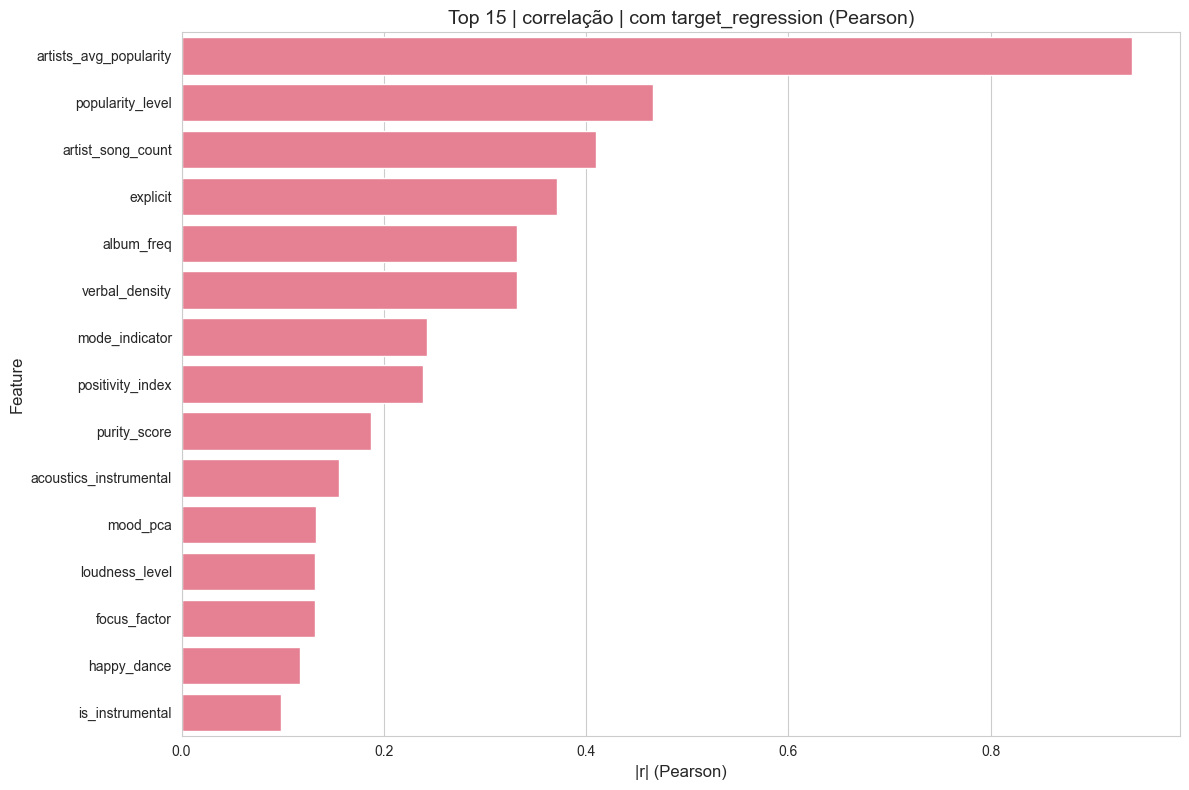

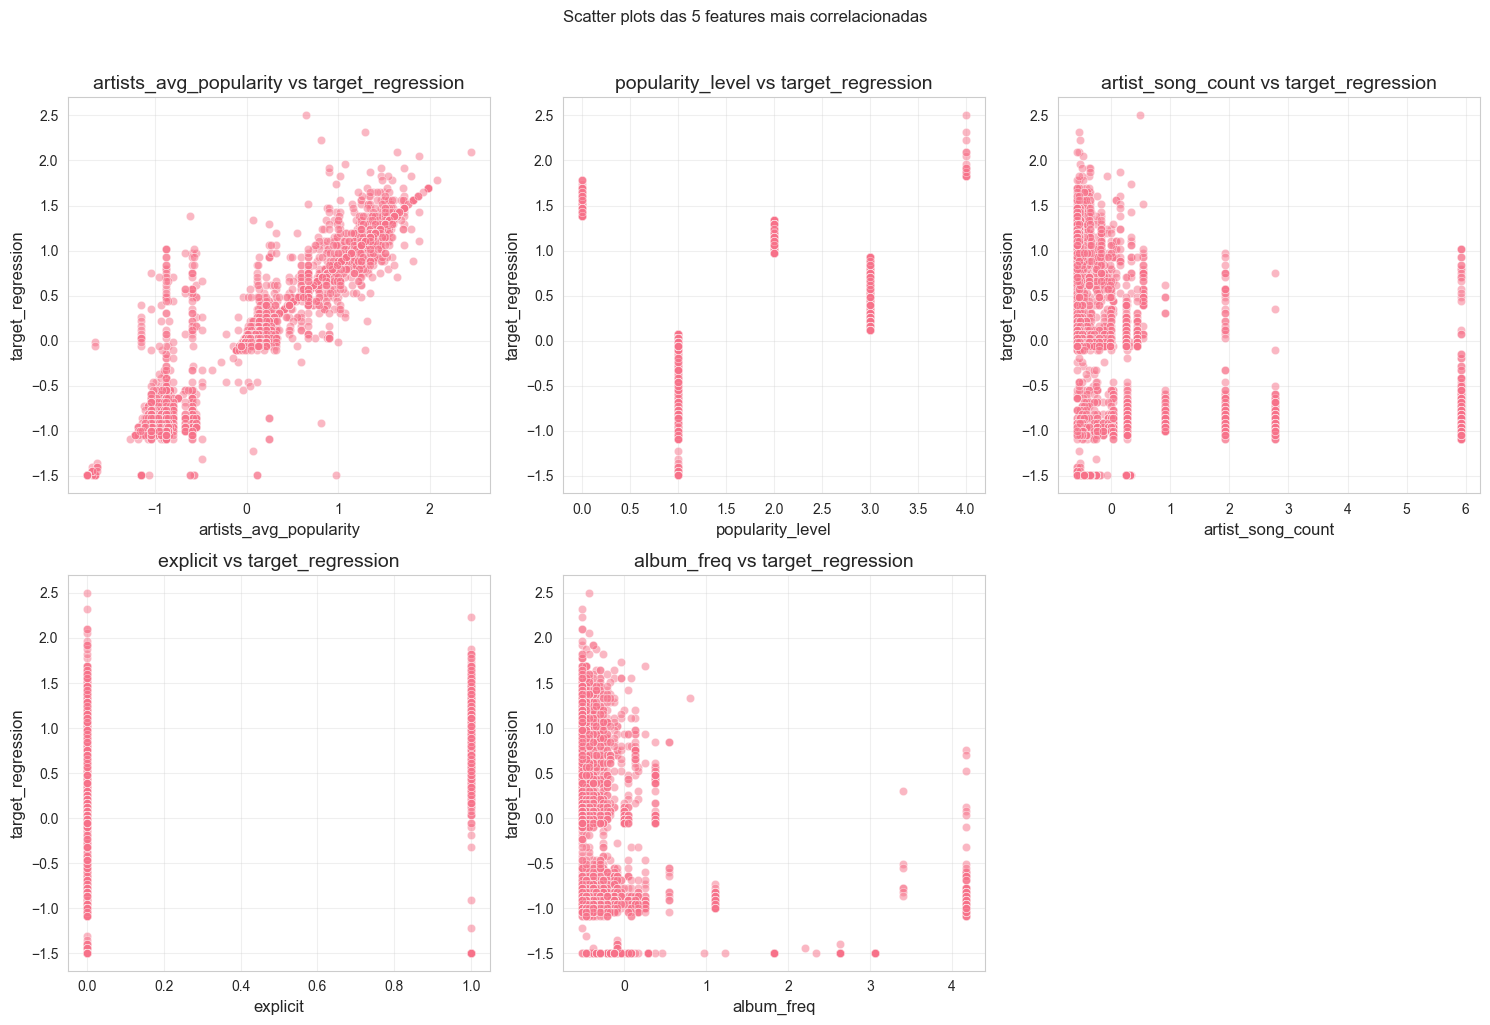

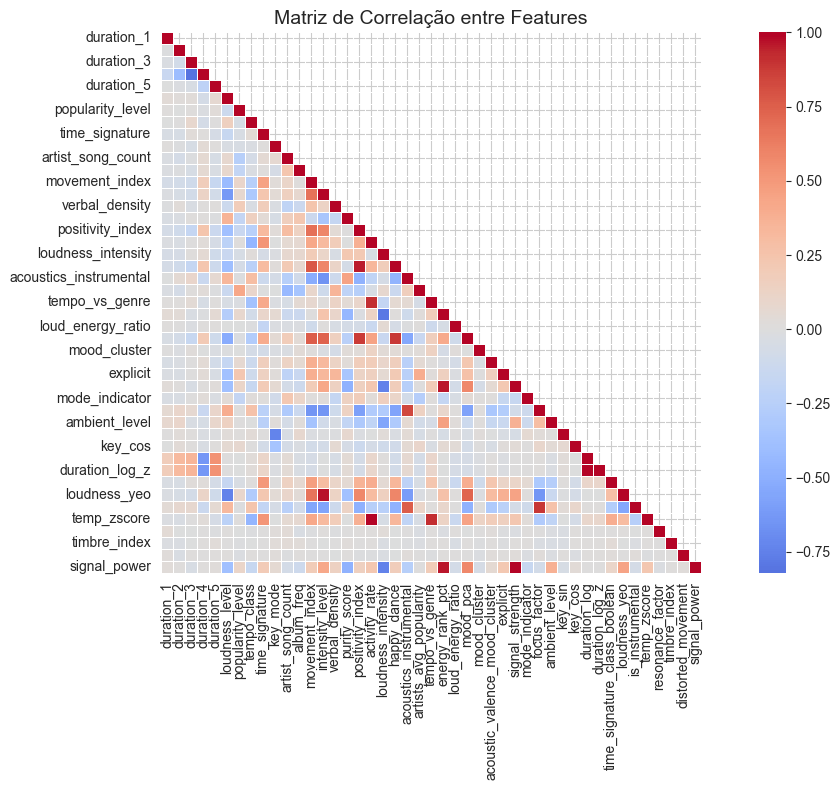

In [18]:
# 1) Seleciona apenas numéricas e remove o target
num_df = df.select_dtypes(include=[np.number])
X = num_df.drop(columns=[target_regression], errors='ignore')
y = df[target_regression]

# 2) Correlações (Pearson é invariante à escala; Spearman capta monotonicidade)
pearson = X.corrwith(y).rename("pearson_r")
spearman = X.rank().corrwith(y.rank()).rename("spearman_r")

# 3) Monta ranking; elimina NaN (ex.: colunas constantes)
corr_rank_regression = (
    pd.concat([pearson, spearman], axis=1)
      .dropna()
      .assign(abs_pearson=lambda d: d['pearson_r'].abs())
      .sort_values('abs_pearson', ascending=False)
)

display(corr_rank_regression.head(20))

# 4) Gráfico de barras do Top-N em |Pearson|
TOP_N = 15
_top = corr_rank_regression.head(TOP_N).reset_index(names='feature')
sns.barplot(data=_top, x='abs_pearson', y='feature')
plt.title(f'Top {TOP_N} | correlação | com {target_regression} (Pearson)')
plt.xlabel('|r| (Pearson)')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

top_5_features = corr_rank_regression.head(5).index.tolist()
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.delaxes(axes[1, 2])  # Remove o último subplot vazio

for idx, feature in enumerate(top_5_features):
    row = idx // 3
    col = idx % 3
    ax = axes[row, col]
    
    sns.scatterplot(data=df, x=feature, y=target_regression, alpha=0.5, ax=ax)
    ax.set_title(f'{feature} vs {target_regression}')
    ax.grid(True, alpha=0.3)

plt.suptitle('Scatter plots das 5 features mais correlacionadas', y=1.02)
plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 8))
correlation_matrix = X.corr()
mask = np.triu(np.ones_like(correlation_matrix), k=1)
sns.heatmap(correlation_matrix, 
            mask=mask,
            annot=False, 
            cmap='coolwarm', 
            center=0,
            square=True,
            fmt='.2f',
            linewidths=0.5)
plt.title('Matriz de Correlação entre Features')
plt.tight_layout()
plt.show()


### Análise bivariada com o target de classificação
Aqui analisamos a relação entre as features e o target de classificação.

### Análise bivariada com o target de classificação
Aqui analisamos a relação entre as features e o target de classificação.

Top 10 F-score (classificação):


,feature,F_score,p_value
0,movement_index,5302.478902,0.0
1,positivity_index,2496.449463,0.0
2,artists_avg_popularity,1965.653470,0.0
3,focus_factor,1882.780812,0.0
4,mood_pca,1843.731518,0.0
5,intensity_level,1825.088516,0.0
6,happy_dance,1781.270673,0.0
7,loudness_yeo,1660.211361,0.0
8,is_instrumental,1089.234841,0.0
9,artist_song_count,974.706533,0.0


C:\Users\DavidMendonça\AppData\Local\Temp\ipykernel_11448\1469616412.py:36: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


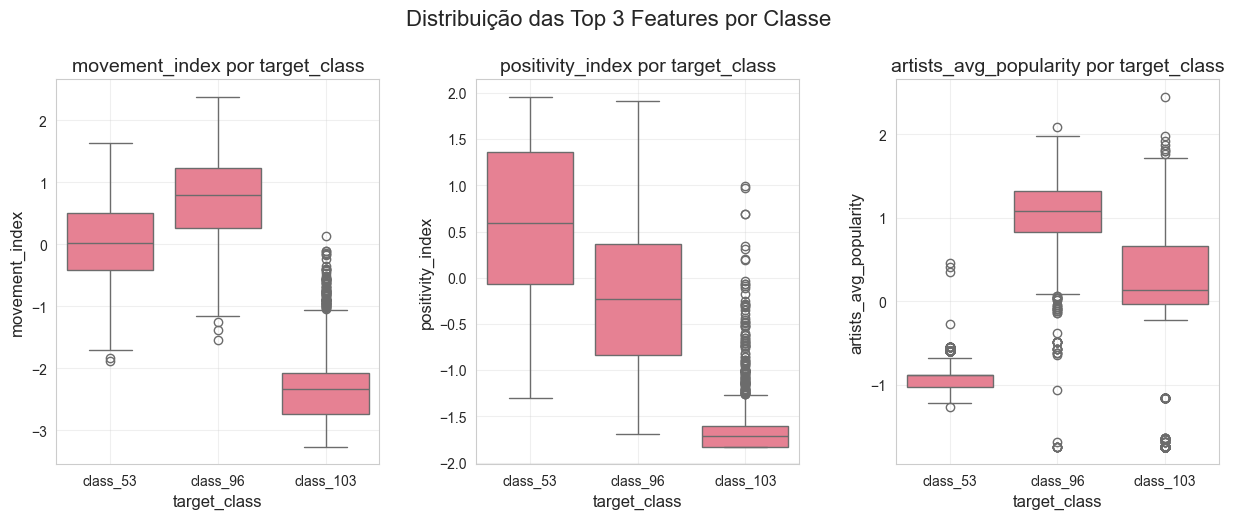

In [19]:
top10_f = None

X = df.select_dtypes(include=[np.number]).copy()
X = X.drop(columns=[target_regression])
y = df[target_class].astype(str)

le = LabelEncoder()
y_enc = le.fit_transform(y) # transformar labels em inteiros

# remover colunas com NaN e constantes

X = X.loc[:, X.nunique() > 1]

f_vals, p_vals = f_classif(X, y_enc)
fdf = pd.DataFrame({"feature": X.columns, "F_score": f_vals, "p_value": p_vals})
fdf = fdf.replace([np.inf, -np.inf], np.nan).dropna(subset=["F_score"])
top10_f = fdf.sort_values("F_score", ascending=False).head(10).reset_index(drop=True)

print("Top 10 F-score (classificação):")
display(top10_f)

# boxplots para as 3 melhores
top3 = top10_f["feature"].head(3).tolist()
classes_sorted = sorted(df[target_class].astype(str).unique())
fig = plt.figure(figsize=(15, 5))
gs = gridspec.GridSpec(1, 3)
gs.update(wspace=0.3)

for i, feat in enumerate(top3):
    ax = plt.subplot(gs[i])
    sns.boxplot(data=df, x=target_class, y=feat)
    plt.title(f"{feat} por {target_class}")
    plt.grid(True, alpha=0.3)

plt.suptitle("Distribuição das Top 3 Features por Classe", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# 3. Methods Application – Regression

> Conforme o *enunciado*, nesta secção construímos e avaliamos modelos de **regressão** para prever `target_regression` usando *hold-out*.

In [20]:
from sklearn.model_selection import train_test_split

numeric_cols = df.select_dtypes(include='number').columns.tolist()
feature_cols = [c for c in numeric_cols if c != target_regression]

X_all = df[feature_cols].copy()
y_all = df[target_regression].copy()

RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.25, random_state=RANDOM_STATE
)

print("Hold-out pronto. Treino:", X_train.shape, "| Teste:", X_test.shape)


Hold-out pronto. Treino: (2246, 45) | Teste: (749, 45)


## 3.1 Simple Linear Regression

Testamos **várias *features* individualmente**. Para cada uma treinamos um modelo `LinearRegression` e avaliamos no *hold-out* com **R², MAE e RMSE**. No fim, mostramos o *ranking* e destacamos a melhor *feature*.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Função auxiliar para métricas
def _metrics(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    rmse = mean_squared_error(y_true, y_pred, squared=False)
    return r2, mae, rmse

results_simple = []

for col in feature_cols:
    # treino com uma única coluna
    model = LinearRegression()
    model.fit(X_train[[col]], y_train)
    preds = model.predict(X_test[[col]])
    r2, mae, rmse = _metrics(y_test, preds)
    results_simple.append({'feature': col, 'R2': r2, 'MAE': mae, 'RMSE': rmse})

simple_df = pd.DataFrame(results_simple).sort_values(by=['R2', 'RMSE'], ascending=[False, True]).reset_index(drop=True)
print("Top 10 (Simple Regression):")
display(simple_df.head(10))

best_feature = simple_df.iloc[0]['feature']
print(f"\nMelhor feature (simple regression): {best_feature}")

# Modelo final com a melhor *feature*
simple_best_model = LinearRegression().fit(X_train[[best_feature]], y_train)
simple_best_pred = simple_best_model.predict(X_test[[best_feature]])
simple_best_scores = dict(zip(['R2','MAE','RMSE'], _metrics(y_test, simple_best_pred)))
print("Desempenho (melhor feature):", simple_best_scores)

TypeError: got an unexpected keyword argument 'squared'

<Figure size 1200x800 with 0 Axes>

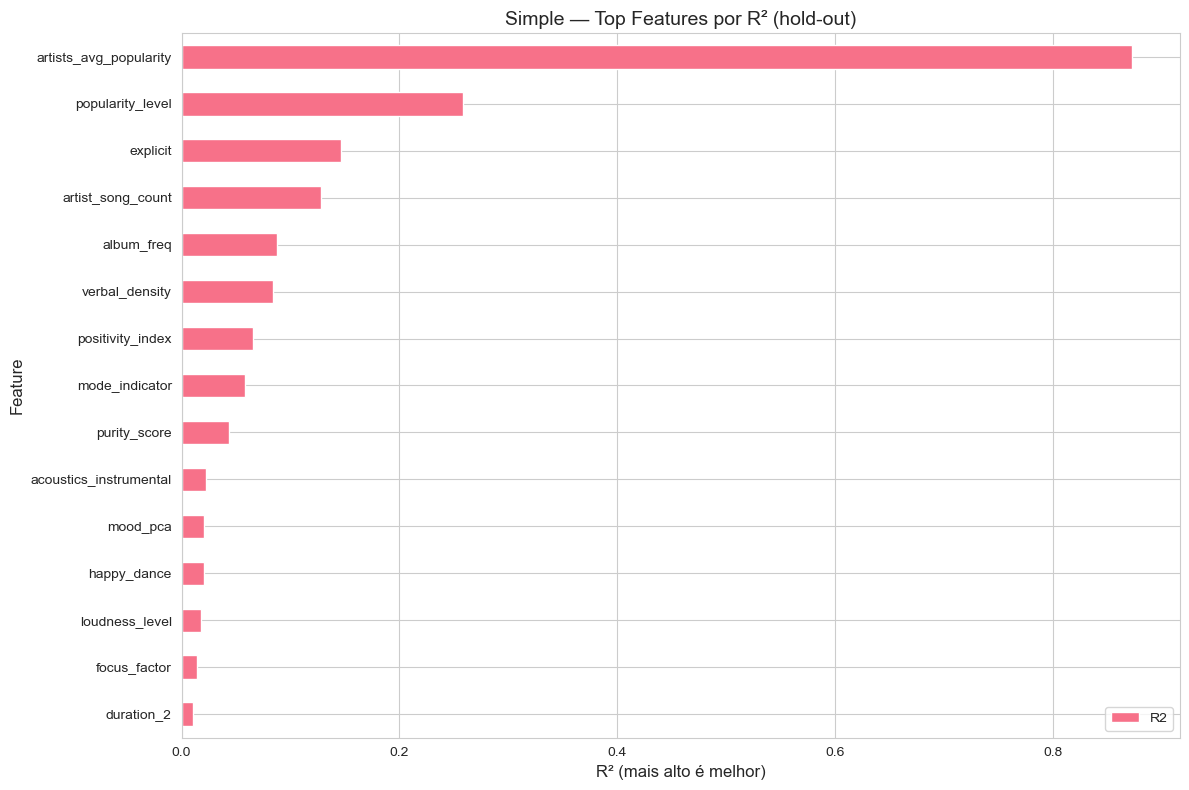

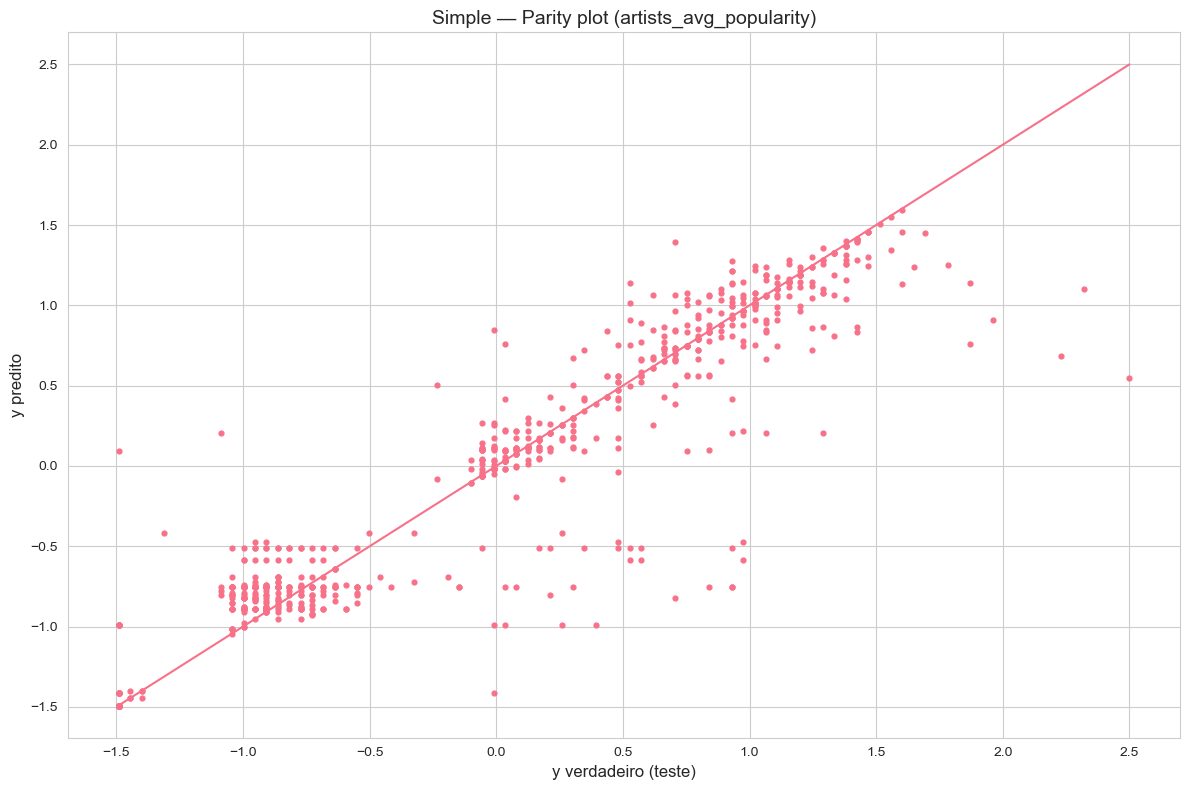

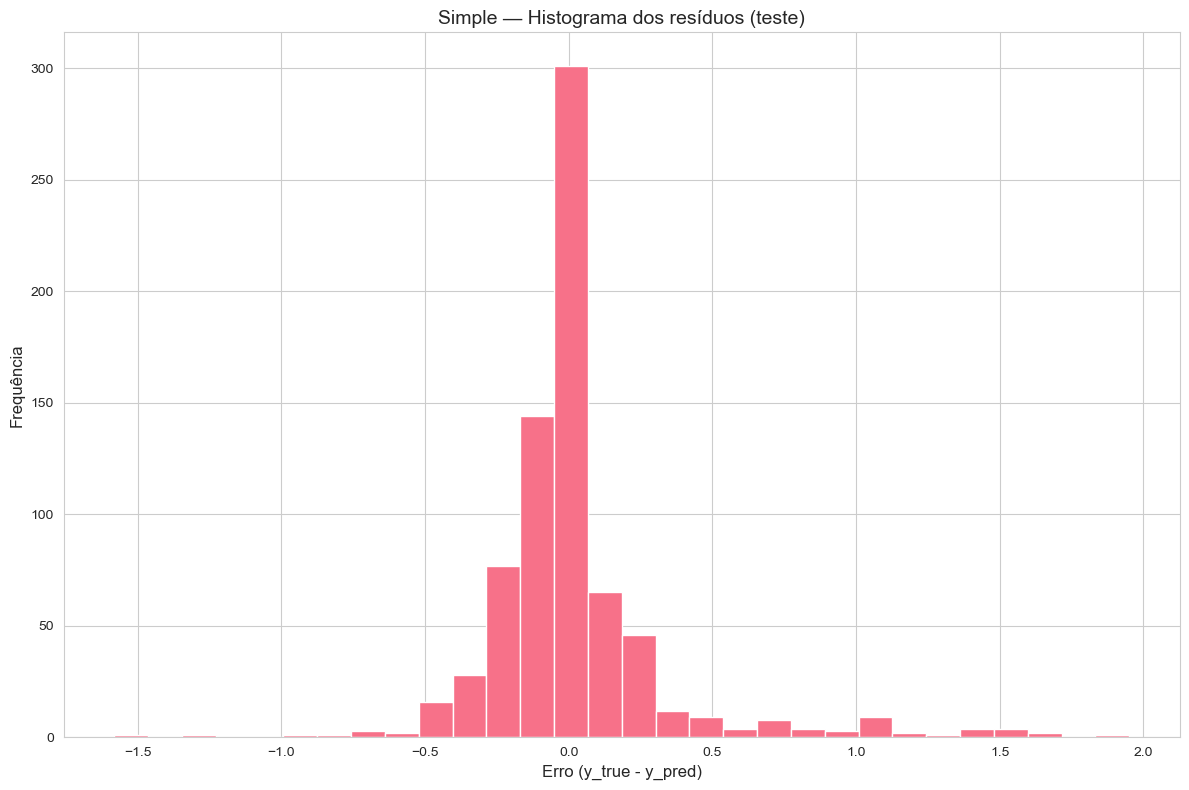

In [ ]:
# Ranking por R² (Top-N)
_top_n = min(15, len(simple_df))
fig = plt.figure()
simple_df.sort_values('R2', ascending=True).tail(_top_n).plot(x='feature', y='R2', kind='barh')
plt.title('Simple — Top Features por R² (hold-out)')
plt.xlabel('R² (mais alto é melhor)')
plt.ylabel('Feature')
plt.tight_layout(); plt.show()

# Parity plot (melhor feature)
from sklearn.linear_model import LinearRegression
_simple_best = LinearRegression().fit(X_train[[best_feature]], y_train)
_simple_pred = _simple_best.predict(X_test[[best_feature]])

fig = plt.figure()
plt.scatter(y_test, _simple_pred, s=12)
_min = min(y_test.min(), _simple_pred.min())
_max = max(y_test.max(), _simple_pred.max())
plt.plot([_min, _max], [_min, _max])
plt.title(f'Simple — Parity plot ({best_feature})')
plt.xlabel('y verdadeiro (teste)'); plt.ylabel('y predito')
plt.tight_layout(); plt.show()

# Histograma de resíduos
fig = plt.figure()
resid = y_test - _simple_pred
plt.hist(resid, bins=30)
plt.title('Simple — Histograma dos resíduos (teste)')
plt.xlabel('Erro (y_true - y_pred)'); plt.ylabel('Frequência')
plt.tight_layout(); plt.show()

## 3.2 Multiple Linear Regression

Avaliamos diferentes **conjuntos de *features***:
- **Todas** as *features* numéricas;
- Top-*k* por correlação de Pearson com a variável alvo (`k ∈ {3,5,10}`);
- `SelectKBest(f_regression)` com `k ∈ {3,5,10}`.

Usamos o mesmo *hold-out* para comparação direta.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

def _eval_set(name, cols):
    model = LinearRegression()
    model.fit(X_train[cols], y_train)
    preds = model.predict(X_test[cols])
    r2, mae, rmse = _metrics(y_test, preds)
    return {'set': name, 'n_features': len(cols), 'R2': r2, 'MAE': mae, 'RMSE': rmse, 'features': cols}

experiments = []

# (A) Todas as *features*
experiments.append(_eval_set("all_numeric", feature_cols))

# (B) Top-k por |correlação| com y
corrs = {}
for c in feature_cols:
    corrs[c] = np.corrcoef(X_train[c], y_train)[0,1]

corr_sorted = [c for c,_ in sorted(corrs.items(), key=lambda kv: (abs(kv[1]) if kv[1]==kv[1] else -1), reverse=True)]
for k in [3,5,10]:
    cols_k = corr_sorted[:min(k, len(corr_sorted))]
    experiments.append(_eval_set(f"pearson_top_{len(cols_k)}", cols_k))

# (C) SelectKBest (f_regression)
for k in [3,5,10]:
    k_eff = min(k, len(feature_cols))
    skb = SelectKBest(score_func=f_regression, k=k_eff)
    skb.fit(X_train[feature_cols], y_train)
    mask = skb.get_support(indices=True)
    cols_k = [feature_cols[i] for i in mask]
    experiments.append(_eval_set(f"selectkbest_{len(cols_k)}", cols_k))

multi_df = pd.DataFrame(experiments).sort_values(by=['R2','RMSE'], ascending=[False, True]).reset_index(drop=True)
print("Resultados (Multiple Regression) — ordenado por R² desc e RMSE asc:")
display(multi_df[['set','n_features','R2','MAE','RMSE']].head(10))

best_row = multi_df.iloc[0]
best_set_name = best_row['set']
best_set_cols = best_row['features']
print(f"\nMelhor conjunto: {best_set_name} (n={len(best_set_cols)})")

Resultados (Multiple Regression) — ordenado por R² desc e RMSE asc:


,set,n_features,R2,MAE,RMSE
0,all_numeric,45,0.884244,0.186541,0.312633
1,selectkbest_10,10,0.881762,0.184899,0.315967
2,pearson_top_10,10,0.881762,0.184899,0.315967
3,selectkbest_3,3,0.881606,0.184944,0.316176
4,pearson_top_3,3,0.881606,0.184944,0.316176
5,selectkbest_5,5,0.881471,0.185246,0.316356
6,pearson_top_5,5,0.881471,0.185246,0.316356



Melhor conjunto: all_numeric (n=45)


<Figure size 1200x800 with 0 Axes>

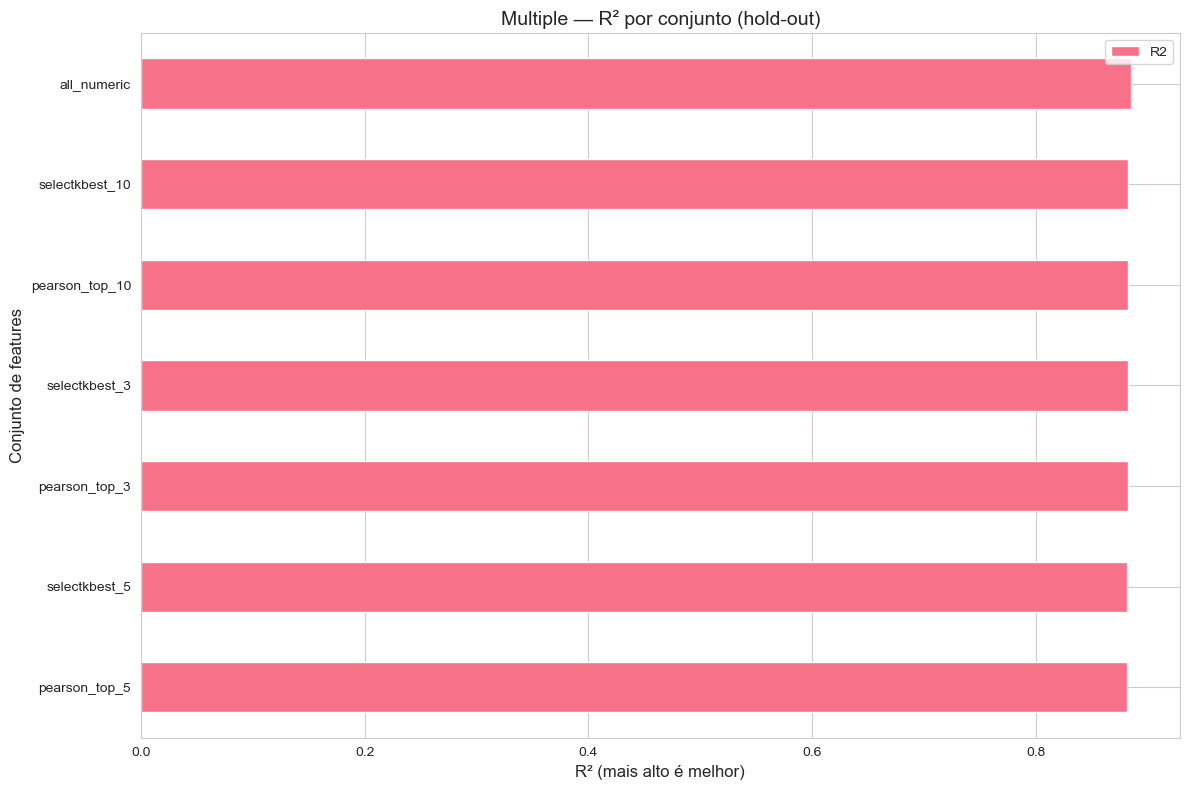

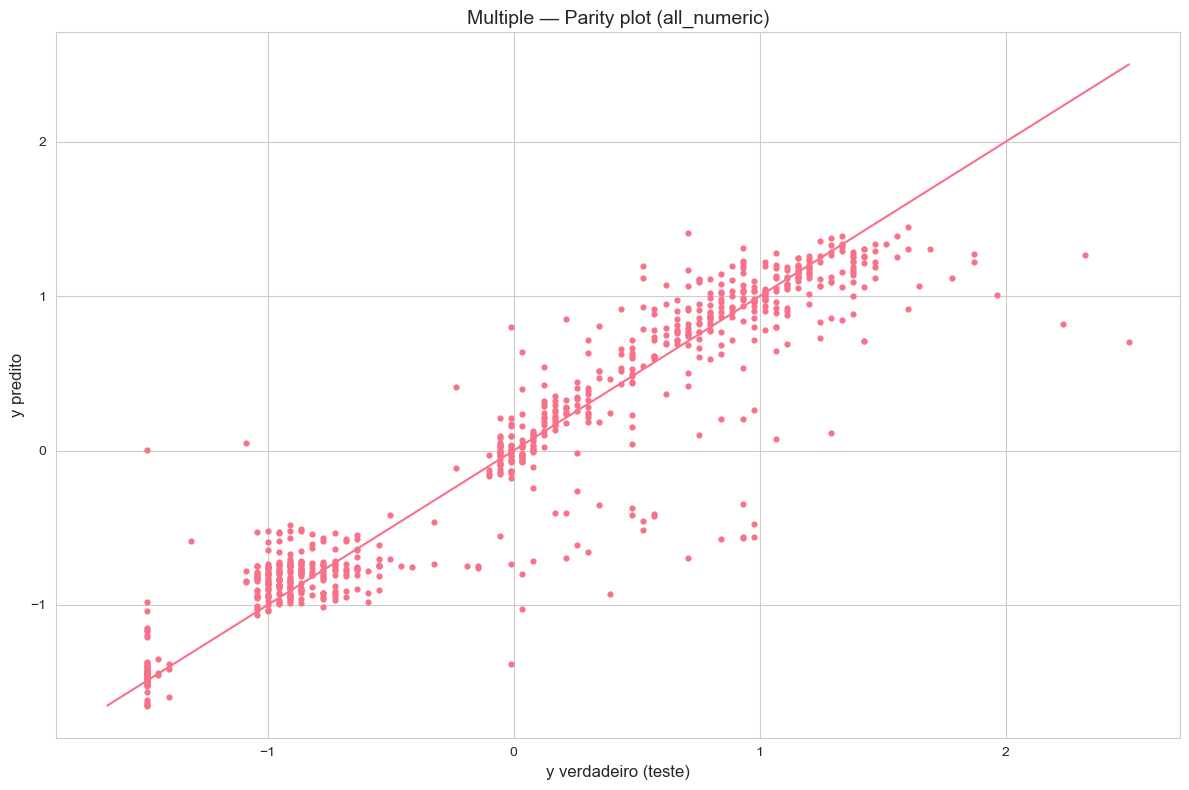

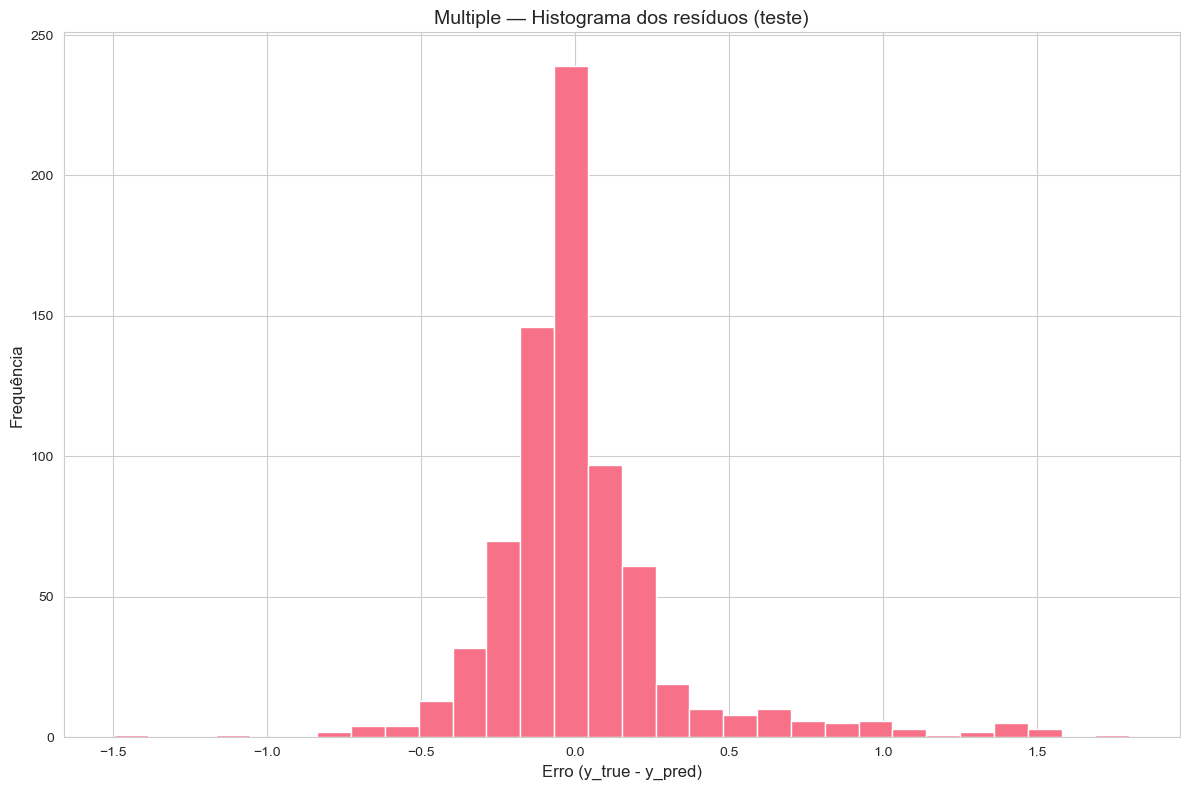

In [ ]:
# Ranking por R² entre conjuntos testados
fig = plt.figure()
_multi_plot_df = multi_df[['set','R2']].copy().sort_values('R2', ascending=True)
_multi_plot_df.plot(x='set', y='R2', kind='barh')
plt.title('Multiple — R² por conjunto (hold-out)')
plt.xlabel('R² (mais alto é melhor)')
plt.ylabel('Conjunto de features')
plt.tight_layout(); plt.show()

# Parity plot (melhor conjunto)
from sklearn.linear_model import LinearRegression
_multi_best = LinearRegression().fit(X_train[best_set_cols], y_train)
_multi_pred = _multi_best.predict(X_test[best_set_cols])

fig = plt.figure()
plt.scatter(y_test, _multi_pred, s=12)
_min = min(y_test.min(), _multi_pred.min())
_max = max(y_test.max(), _multi_pred.max())
plt.plot([_min, _max], [_min, _max])
plt.title(f'Multiple — Parity plot ({best_set_name})')
plt.xlabel('y verdadeiro (teste)'); plt.ylabel('y predito')
plt.tight_layout(); plt.show()

# Histograma dos resíduos
fig = plt.figure()
resid_m = y_test - _multi_pred
plt.hist(resid_m, bins=30)
plt.title('Multiple — Histograma dos resíduos (teste)')
plt.xlabel('Erro (y_true - y_pred)'); plt.ylabel('Frequência')
plt.tight_layout(); plt.show()

## 3.3 Comparação entre Modelos de Regressão

A tabela abaixo junta o **melhor Simple** (1 *feature*) e o **melhor Multiple** (várias *features*) para facilitar a comparação por **R², MAE e RMSE**.

In [ ]:
# Reconstituir as métricas do best simple
best_simple_row = simple_df.iloc[0]
best_simple_name = f"simple::{best_simple_row['feature']}"
best_simple_scores = {'R2': best_simple_row['R2'], 'MAE': best_simple_row['MAE'], 'RMSE': best_simple_row['RMSE']}

# Métricas do best multiple já estão em best_row
best_multiple_scores = {'R2': best_row['R2'], 'MAE': best_row['MAE'], 'RMSE': best_row['RMSE']}

summary = pd.DataFrame([
    {'Model': best_simple_name, **best_simple_scores},
    {'Model': f"multiple::{best_set_name}", **best_multiple_scores},
]).sort_values(by=['R2','RMSE'], ascending=[False, True]).reset_index(drop=True)

print("Resumo (melhores modelos):")
display(summary)

#Notas:
#- R² mais elevado indica melhor explicação da variância do alvo;
#- MAE e RMSE mais baixos indicam erros médios menores;
#- Caso o *multiple* vença com margem substancial, sugere benefício em combinar features
# Se a diferença for pequena, um modelo simples pode ser preferível pela interpretabilidade


Resumo (melhores modelos):


,Model,R2,MAE,RMSE
0,multiple::all_numeric,0.884244,0.186541,0.312633
1,simple::artists_avg_popularity,0.872881,0.177149,0.327619


<Figure size 1200x800 with 0 Axes>

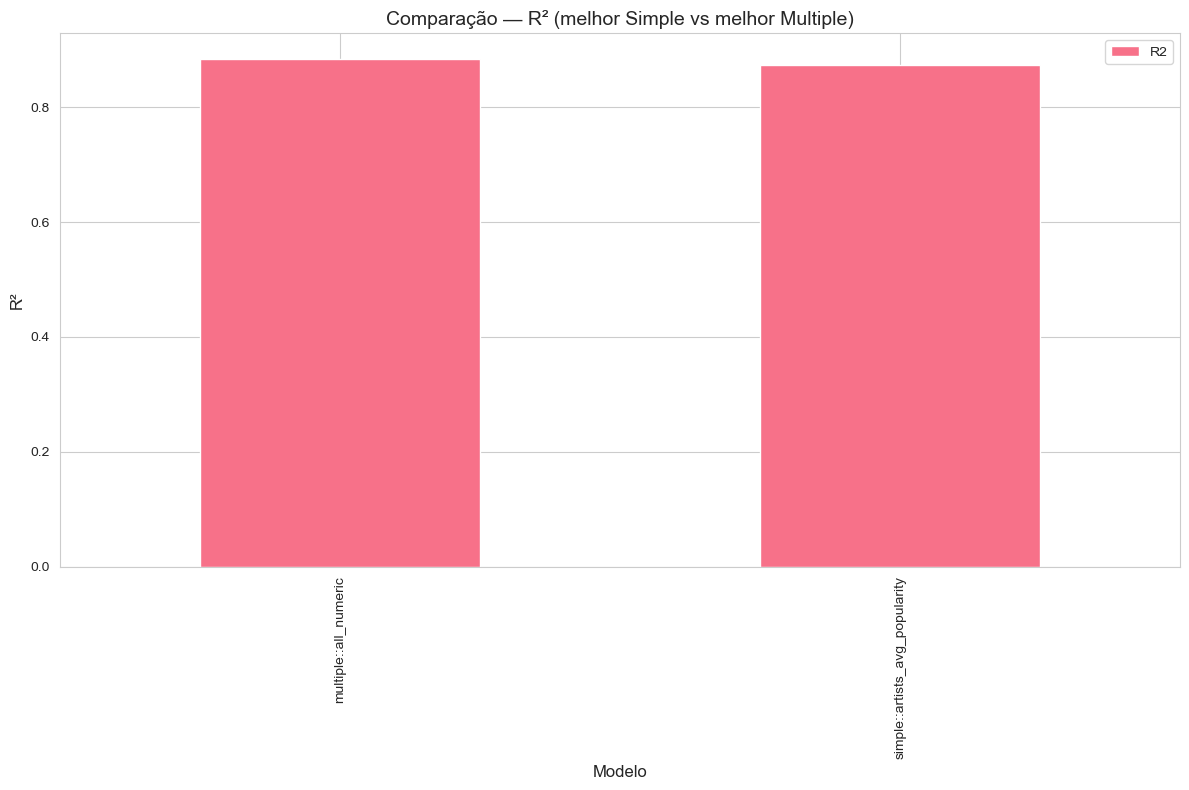

<Figure size 1200x800 with 0 Axes>

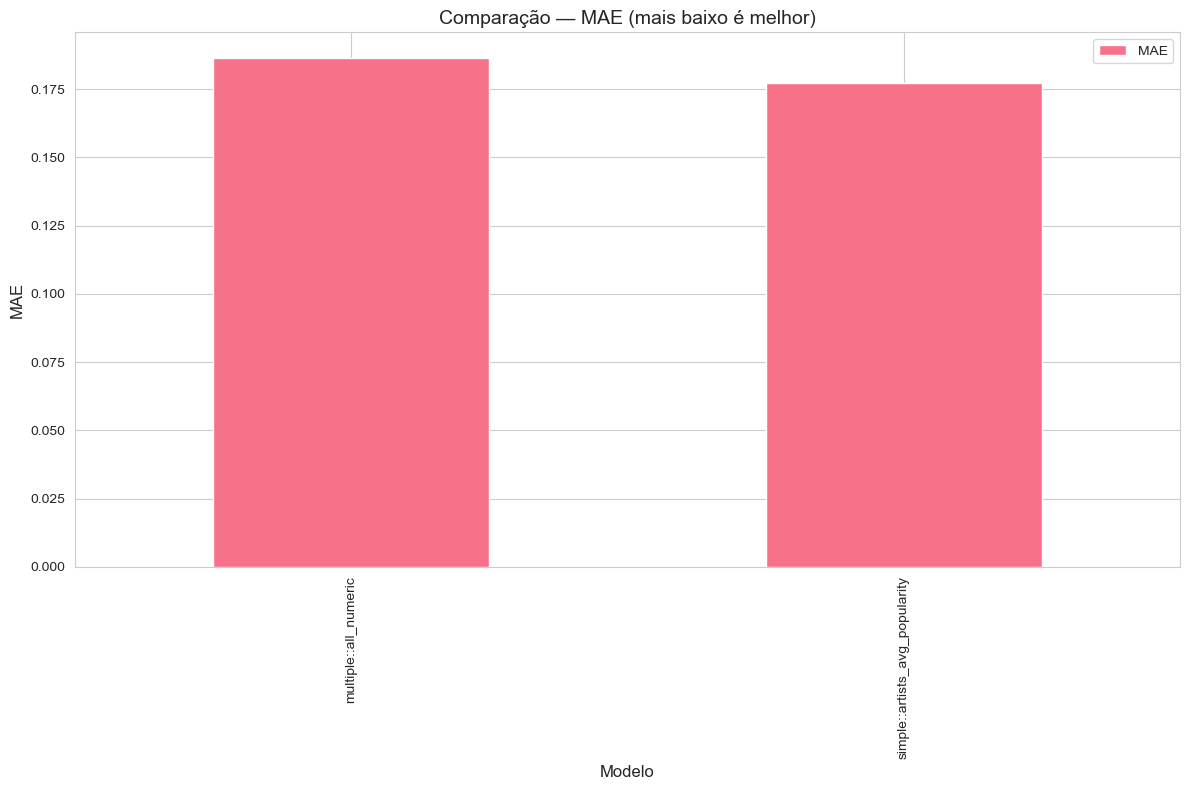

<Figure size 1200x800 with 0 Axes>

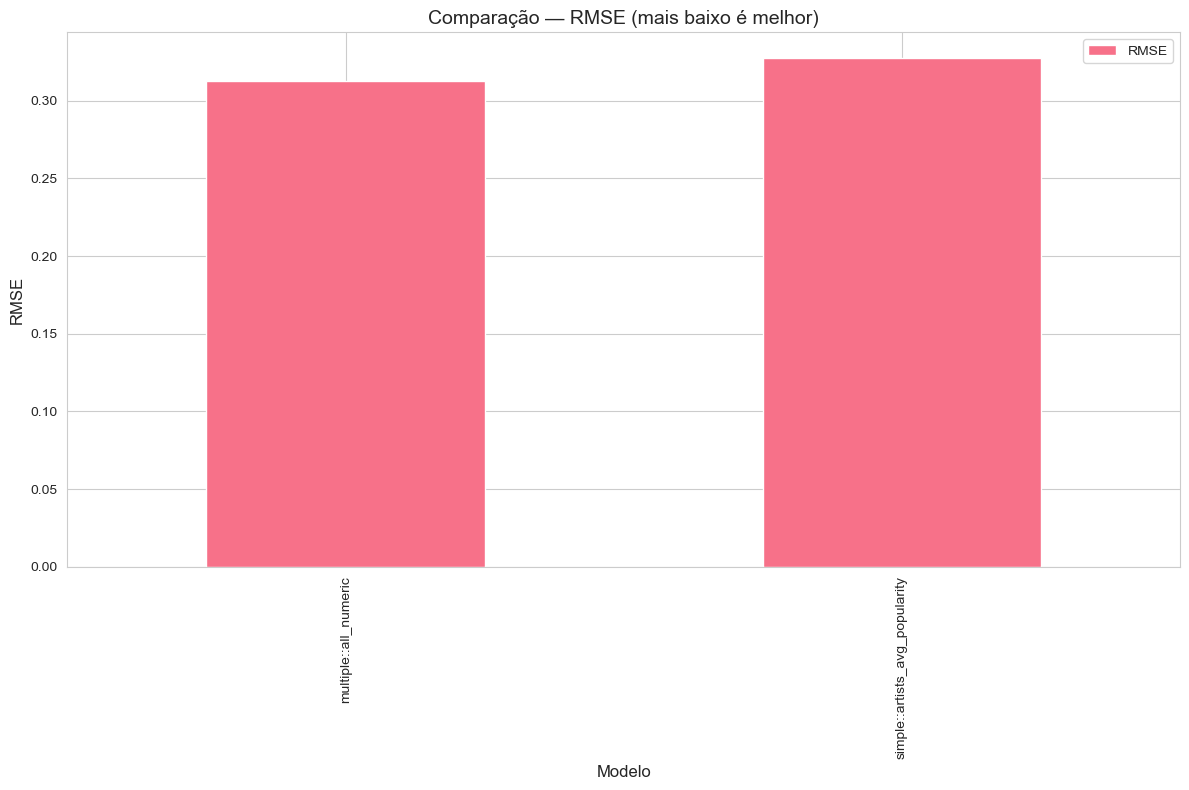

In [ ]:
_summary_df = summary.copy()

# R²
fig = plt.figure()
_summary_df.plot(x='Model', y='R2', kind='bar')
plt.title('Comparação — R² (melhor Simple vs melhor Multiple)')
plt.xlabel('Modelo'); plt.ylabel('R²')
plt.tight_layout(); plt.show()

# MAE
fig = plt.figure()
_summary_df.plot(x='Model', y='MAE', kind='bar')
plt.title('Comparação — MAE (mais baixo é melhor)')
plt.xlabel('Modelo'); plt.ylabel('MAE')
plt.tight_layout(); plt.show()

# RMSE
fig = plt.figure()
_summary_df.plot(x='Model', y='RMSE', kind='bar')
plt.title('Comparação — RMSE (mais baixo é melhor)')
plt.xlabel('Modelo'); plt.ylabel('RMSE')
plt.tight_layout(); plt.show()